<a href="https://colab.research.google.com/github/Junghwan-brian/Colab/blob/main/SWA%EC%8B%A4%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Oct 14 03:43:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
%matplotlib inline
learning_rate=0.05
batch_size = 128
num_epochs = 5
def create_model(opt):
    resnet50 = ResNet50(weights='imagenet', include_top=False,
                    input_shape=(32, 32, 3))
    input_seq = tf.keras.layers.Input(shape=(32, 32, 3))
    x = resnet50(input_seq)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(seed=0),kernel_regularizer='l2')(x)
    output = tf.keras.layers.Dense(10,kernel_initializer=tf.keras.initializers.glorot_normal(seed=0), activation='softmax')(x)

    model = tf.keras.Model(
        inputs=input_seq, outputs=output, name='resnet')
    # Model is the full model w/o custom layers
    model.compile(optimizer=opt,  # Optimization
                        loss='sparse_categorical_crossentropy',  # Loss Function
                        metrics=['accuracy'])
    return model
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255.
x_test = x_test/255.
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).prefetch(tf.data.experimental.AUTOTUNE).batch(batch_size).repeat()
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

steps_per_epoch = len(x_train) // batch_size
validation_steps = len(x_test) // batch_size


170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(tf.__version__)

2.3.0


In [4]:

sgd = tf.keras.optimizers.SGD(learning_rate,momentum=0.9)
model = create_model(sgd)
sgd_hist = model.fit_generator(
    train_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=num_epochs,
)

94773248/94765736 [==============================] - 2s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
390/390 [==============================] - 11s 29ms/step - loss: 2.1310 - accuracy: 0.3929
Epoch 2/5
390/390 [==============================] - 11s 29ms/step - loss: 1.2807 - accuracy: 0.5806
Epoch 3/5
390/390 [==============================] - 11s 29ms/step - loss: 1.1500 - accuracy: 0.6325
Epoch 4/5
390/390 [==============================] - 11s 29ms/step - loss: 1.2721 - accuracy: 0.6195
Epoch 5/5
390/390 [==============================] - 11s 29ms/step - loss: 1.3925 - accuracy: 0.5639


In [5]:
sgd_result = model.evaluate(test_ds)
print(f"sgd result : {sgd_result}")

79/79 [==============================] - 1s 12ms/step - loss: 1.4507 - accuracy: 0.5284
sgd result : [1.4506633281707764, 0.5284000039100647]


In [6]:
sgd = tf.keras.optimizers.SGD(learning_rate,momentum=0.9)
swa = tfa.optimizers.SWA(sgd, start_averaging=0, average_period=10)
model = create_model(swa)

sgd_swa_hist = model.fit_generator(
    train_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=num_epochs,
)

Epoch 1/5
390/390 [==============================] - 18s 47ms/step - loss: 2.0740 - accuracy: 0.4223
Epoch 2/5
390/390 [==============================] - 19s 49ms/step - loss: 1.4446 - accuracy: 0.5287
Epoch 3/5
390/390 [==============================] - 18s 47ms/step - loss: 1.4274 - accuracy: 0.5301
Epoch 4/5
390/390 [==============================] - 20s 51ms/step - loss: 1.4513 - accuracy: 0.5007
Epoch 5/5
390/390 [==============================] - 19s 48ms/step - loss: 1.2588 - accuracy: 0.5808


In [7]:
swa_sgd_result = model.evaluate(test_ds)
print(f"SWA sgd result : {swa_sgd_result}")

79/79 [==============================] - 1s 14ms/step - loss: 1.4220 - accuracy: 0.5640
SWA sgd result : [1.4220163822174072, 0.5640000104904175]


In [8]:
adam = tf.keras.optimizers.Adam(learning_rate)
model = create_model(adam)
adam_hist = model.fit_generator(
    train_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=num_epochs,
)

Epoch 1/5
390/390 [==============================] - 11s 29ms/step - loss: 5.2783 - accuracy: 0.1312
Epoch 2/5
390/390 [==============================] - 11s 29ms/step - loss: 1.9922 - accuracy: 0.1908
Epoch 3/5
390/390 [==============================] - 11s 29ms/step - loss: 1.9401 - accuracy: 0.2030
Epoch 4/5
390/390 [==============================] - 11s 29ms/step - loss: 1.8554 - accuracy: 0.2246
Epoch 5/5
390/390 [==============================] - 11s 29ms/step - loss: 1.8221 - accuracy: 0.2521


In [9]:
adam_result = model.evaluate(test_ds)
print(f"adam result : {adam_result}")

79/79 [==============================] - 1s 11ms/step - loss: 2.3042 - accuracy: 0.2089
adam result : [2.3042259216308594, 0.20890000462532043]


In [10]:
adam = tf.keras.optimizers.Adam(learning_rate)
swa = tfa.optimizers.SWA(adam, start_averaging=0, average_period=10)
model = create_model(swa)
model.compile(optimizer=swa,  # Optimization
                    loss='sparse_categorical_crossentropy',  # Loss Function
                    metrics=['accuracy'])


adam_swa_hist = model.fit_generator(
    train_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=num_epochs,
)

Epoch 1/5
390/390 [==============================] - 22s 57ms/step - loss: 5.1663 - accuracy: 0.1005
Epoch 2/5
390/390 [==============================] - 22s 57ms/step - loss: 2.3061 - accuracy: 0.0988
Epoch 3/5
390/390 [==============================] - 22s 57ms/step - loss: 2.3061 - accuracy: 0.0992
Epoch 4/5
390/390 [==============================] - 22s 57ms/step - loss: 2.3061 - accuracy: 0.0994
Epoch 5/5
390/390 [==============================] - 22s 57ms/step - loss: 2.3062 - accuracy: 0.0994


In [11]:
swa_adam_result = model.evaluate(test_ds)
print(f"SWA adam result : {swa_adam_result}")

79/79 [==============================] - 1s 14ms/step - loss: 2.3067 - accuracy: 0.1000
SWA adam result : [2.3066959381103516, 0.10000000149011612]


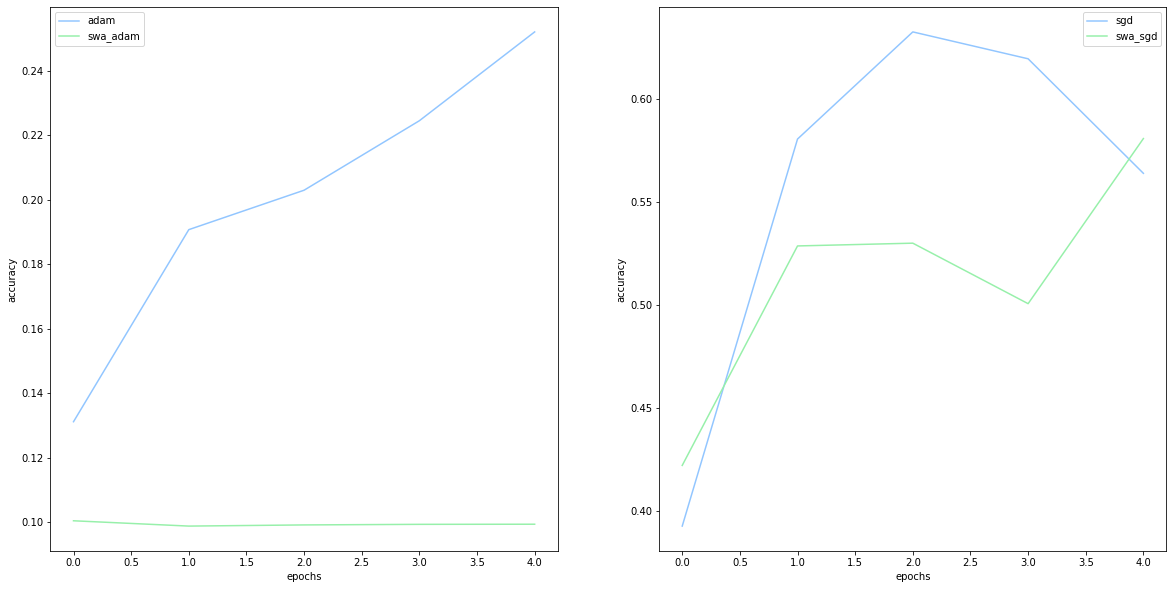

In [12]:
plt.style.use('seaborn-pastel')
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(adam_hist.history['accuracy'],label='adam')
plt.plot(adam_swa_hist.history['accuracy'],label='swa_adam')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(sgd_hist.history['accuracy'],label='sgd')
plt.plot(sgd_swa_hist.history['accuracy'],label='swa_sgd')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [14]:
print(f"adam:{adam_result[1]:.2f}, swa_adam:{swa_adam_result[1]:.2f}, sgd:{sgd_result[1]:.2f}, swa_sgd:{swa_sgd_result[1]:.2f}")

adam:0.21, swa_adam:0.10, sgd:0.53, swa_sgd:0.56
